In [1]:
# import dependencies
import pandas as pd

In [2]:
# read in csv treadmill and outdoor runs
df = pd.read_csv("output/full_dataset.csv")

## Data Proprocessing Code

In [3]:
# verify (rows, columns) of dataframe
df.shape

(183641, 33)

In [4]:
df.columns

Index(['braking_gs', 'contact_ratio', 'contact_time', 'cycle_time', 'date',
       'debug_1', 'debug_2', 'flight_ratio', 'flight_time', 'footstrike_type',
       'footstrike_type_new', 'impact_gs', 'injury_status', 'laterality',
       'max_pronation_velocity', 'medium', 'power',
       'pronation_excursion_fs_mp', 'pronation_excursion_mp_to', 'shock',
       'split_cycle_time', 'split_stride_pace', 'stance_excursion_fs_mp',
       'stance_excursion_mp_to', 'step', 'step_length', 'step_rate',
       'stride_angle', 'stride_length', 'stride_pace', 'subject_id',
       'timestamp', 'walking'],
      dtype='object')

In [23]:
# remove date, debug_1, debug_2, power, subject_id, timestamp, walking
total_df = df.filter(items = ['braking_gs', 'contact_ratio', 'contact_time', 'cycle_time', 
                                    'flight_ratio', 'flight_time', 'footstrike_type',
                                    'footstrike_type_new', 'impact_gs', 'injury_status', 'laterality',
                                    'max_pronation_velocity', 'medium',
                                    'pronation_excursion_fs_mp', 'pronation_excursion_mp_to', 'shock',
                                    'split_cycle_time', 'split_stride_pace', 'stance_excursion_fs_mp',
                                    'stance_excursion_mp_to', 'step', 'step_length', 'step_rate',
                                    'stride_angle', 'stride_length', 'stride_pace'])
    
total_df.shape

(183641, 26)

In [6]:
# function to check for missing data
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(total_df.apply(num_missing, axis=0))

#Applying per row:
print("\nMissing values per row:")
print(total_df.apply(num_missing, axis=1).head()) 

Missing values per column:
braking_gs                   0
contact_ratio                0
contact_time                 0
cycle_time                   0
flight_ratio                 0
flight_time                  0
footstrike_type              0
footstrike_type_new          0
impact_gs                    0
injury_status                0
laterality                   0
max_pronation_velocity       0
medium                       0
pronation_excursion_fs_mp    2
pronation_excursion_mp_to    1
shock                        0
split_cycle_time             0
split_stride_pace            0
stance_excursion_fs_mp       0
stance_excursion_mp_to       0
step                         0
step_length                  0
step_rate                    0
stride_angle                 0
stride_length                0
stride_pace                  0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [7]:
# remove observations with missing data (if any)
total_df = total_df.dropna()

## Classifier Code

In [8]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [9]:
# set outcome target for classifiers
target = total_df["medium"]

# replace strings with numbers
target = target.replace('outdoor', 0)
target = target.replace('treadmill', 1)
target_names = ["outdoor", "treadmill"]

# set data for classifers
data = total_df.drop("medium", axis=1)
feature_names = data.columns

In [10]:
# create dummy variables for categorical variables
data = pd.get_dummies(data, columns = ['injury_status', 'laterality'])

In [11]:
# split data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [12]:
# logistics regression
logistic_regr = LogisticRegression(class_weight = 'balanced', solver = 'liblinear') #model parameters
logistic_regr = logistic_regr.fit(X_train, y_train) #fit the model
y_pred_log = logistic_regr.predict(X_test)

print(f"Model Score: {logistic_regr.score(X_test, y_test)}")
#print(f"Accuracy Score: {logistic_regr.accuracy_score(y_test, y_pred_log)}")

Model Score: 0.7335221084730995


In [13]:
# predict probabilities
probs_log = logistic_regr.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs_log = probs_log[:, 1]

# calculate AUC
auc_log = roc_auc_score(y_test, probs_log)
print(f'AUC: {auc_log:.3f}')

# calculate roc curve
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, probs_log)

AUC: 0.844


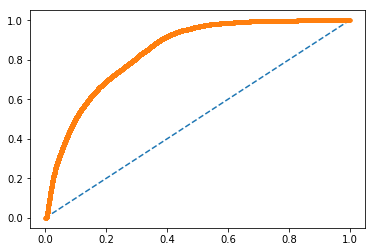

In [14]:
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_log, tpr_log, marker='.')
# show the plot
pyplot.show()

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9722718362012633

In [16]:
# predict probabilities
probs_clf = clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs_clf = probs_clf[:, 1]

# calculate AUC
auc_clf = roc_auc_score(y_test, probs_clf)
print(f'AUC: {auc_clf:.3f}')

# calculate roc curve
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_test, probs_clf)

AUC: 0.965


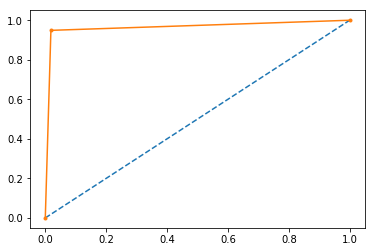

In [17]:
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_clf, tpr_clf, marker='.')
# show the plot
pyplot.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9872358963188848

In [19]:
# predict probabilities
probs_rf = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs_rf = probs_rf[:, 1]

# calculate AUC
auc_rf = roc_auc_score(y_test, probs_rf)
print(f'AUC:{auc_rf:.3}')

# calculate roc curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

AUC:0.999


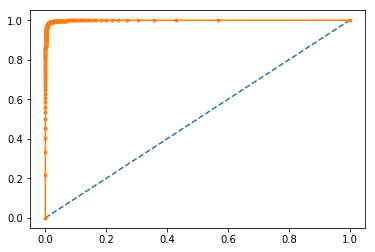

In [20]:
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr_rf, tpr_rf, marker='.')
# show the plot
pyplot.show()

In [21]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.09271530821774596, 'injury_status'),
 (0.09034623258137821, 'laterality'),
 (0.07531493636199198, 'max_pronation_velocity'),
 (0.07444377442562287, 'step_rate'),
 (0.060109396695842525, 'stance_excursion_mp_to'),
 (0.04886972237702819, 'split_stride_pace'),
 (0.046732493105534116, 'stance_excursion_fs_mp'),
 (0.04051965097734178, 'split_cycle_time'),
 (0.040153535230348786, 'pronation_excursion_mp_to'),
 (0.03894616081741134, 'cycle_time'),
 (0.037393264126526576, 'footstrike_type_new'),
 (0.032965000101394824, 'step'),
 (0.03214409613053955, 'shock'),
 (0.030962701721157414, 'stride_angle'),
 (0.02690447267880026, 'contact_ratio'),
 (0.023956584789889903, 'step_length'),
 (0.023786003660842995, 'flight_ratio'),
 (0.02119544436593152, 'footstrike_type'),
 (0.021163341706702768, 'contact_time'),
 (0.021139140810259246, 'stride_pace'),
 (0.021002866809677292, 'braking_gs'),
 (0.02085377042679361, 'flight_time'),
 (0.01866551106907819, 'stride_length'),
 (0.010683484544501269, 'pronat

In [22]:
# take out step, laterality, injury status, stride length, shock, footstrike type
total_first_filter = total_df(items = ['braking_gs', 'contact_ratio', 
                                              'contact_time', 'cycle_time', 
                                              'flight_ratio', 'flight_time',
                                              'footstrike_type_new', 'impact_gs', 
                                              'max_pronation_velocity', 'medium',
                                              'pronation_excursion_fs_mp', 'pronation_excursion_mp_to',
                                              'split_cycle_time', 'split_stride_pace', 'stance_excursion_fs_mp',
                                              'stance_excursion_mp_to', 'step_length', 'step_rate',
                                              'stride_angle', 'stride_pace'])


TypeError: 'DataFrame' object is not callable

In [ ]:
target2 = total_first_filter["medium"]
target_names2 = ["outdoor", "treadmill"]

data2 = total_first_filter.drop("medium", axis=1)
feature_names2 = data.columns

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, target2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regr2 = LogisticRegression(class_weight = 'balanced', solver = 'liblinear')
logistic_regr2 = logistic_regr2.fit(X_train, y_train)
logistic_regr2.score(X_test2, y_test2)

In [ ]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf.fit(X_train2, y_train2)
clf2.score(X_test2, y_test2)

In [ ]:
rf = RandomForestClassifier(n_estimators=200, class_weight = 'balanced', oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
from sklearn import metrics
y_pred = rf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))


In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [ ]:
# remove bottom half (9 features)
total_second_filter = total_df.filter(items = ['contact_time', 'footstrike_type_new', 
                                               'max_pronation_velocity', 'medium',
                                               'pronation_excursion_fs_mp', 'pronation_excursion_mp_to',
                                               'split_cycle_time', 'split_stride_pace', 'stance_excursion_fs_mp',
                                               'stance_excursion_mp_to', 'step_length', 'stride_pace'])
    
total_second_filter.shape

In [ ]:
target = total_second_filter["medium"]
target_names = ["outdoor", "treadmill"]

data = total_second_filter.drop("medium", axis=1)
feature_names = data.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [ ]:
# top 5 clinical
total_df_3 = total_df.filter(items = ['braking_gs', 'contact_ratio', 'contact_time', 'cycle_time', 
                                    'flight_ratio', 'flight_time', 'footstrike_type',
                                    'footstrike_type_new', 'impact_gs', 'injury_status', 'laterality',
                                    'max_pronation_velocity', 'medium',
                                    'pronation_excursion_fs_mp', 'pronation_excursion_mp_to', 'shock',
                                    'split_cycle_time', 'split_stride_pace', 'stance_excursion_fs_mp',
                                    'stance_excursion_mp_to', 'step', 'step_length', 'step_rate',
                                    'stride_angle', 'stride_length', 'stride_pace'])
    
total_df.shape